# Tarea 2. Eigenfaces
## Isaac Rodríguez Bribiesca

### Resumen. 

In [1]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import numpy as np

### Ejercicio 1. Función PCA

In [2]:
def pca(X, k):
    """Perform PCA via SVD over matrix X

    Args:
        X (numpy 2D array): Data matrix of shape (n, d).
        Where n is the number of examples and d the dimension of each example.
        
        k (int): Number of principal components to extract.

    Returns:
        Data matrix projected on the k PC´s
        
        Set of principal directions
        
        Set of singular values
    """
    # Center data
    X_mu = X - np.mean(X, axis=0)
    
    # Scale data
    #X_s = X_mu / np.std(X_mu, axis=0)
    X_s = X_mu / 1
    
    # SVD calculation
    U, D, V = np.linalg.svd(X_s, full_matrices=True)
    
    # keep only k firts eigenvectors
    V = V.T[:, :k]
    
    # Project data onto k eigenvectors chosen
    X_svd = X.dot(V)
    
    #print("\n Shape D: ", D.shape)
    #print("\n Shape V: ", V.shape)
    #print("\n Shape X_svd: ", X_svd.shape)
    
    return X_svd, V, D

Function for showing images in a grid

In [3]:
def show_images(n_rows, n_cols, images, shape, labels = [], size = 5.):
    
    fig = plt.figure(figsize=(size, size))
    #plt.suptitle(title, size=16)

    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # creates n_rowsxn_cols grid of axes
                     axes_pad=0.1,  # pad between axes in inch.
                     )
        
    if labels:
        grid[0].set_title(labels[0], fontdict=None, loc='center', color = "k")
        grid[1].set_title(labels[1], fontdict=None, loc='center', color = "k")

    for ax, im in zip(grid, images[:n_rows*n_cols]):
        
        ax.imshow(im.reshape(shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

    plt.show()

### Ejercicio 2. MNIST

Load data

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
data = X_test.reshape((10000, 28*28))

print("{0} data examples of size {1}".format(X_test.shape[0], data.shape[1]))

Using TensorFlow backend.


10000 data examples of size 784


Visualizing images

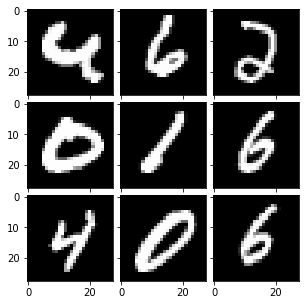

In [5]:
show_images(3, 3, np.random.permutation(data)[:9], (28, 28))

#### a) PCA and variance explained by k first components

Define number of eigenvectors to use

In [199]:
k = 380

Apply PCA to matrix of images $X$

In [200]:
X_svd, V, lambdas = pca(data, k)

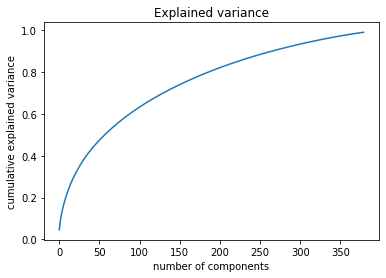

Explained variance by the first 380 eigenvectors: 0.99089986


In [201]:
var_ratio = [l/np.sum(lambdas) for l in lambdas[:k]]

plt.plot(np.cumsum(var_ratio))
plt.title("Explained variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print("Explained variance by the first %s eigenvectors: %s" % (k, np.sum(lambdas[:k])/np.sum(lambdas)))

Visualizing first 9 eigenvectors

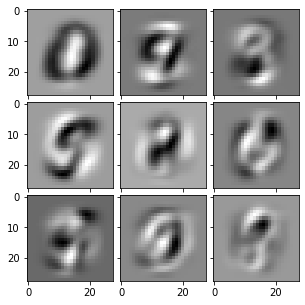

In [9]:
show_images(3, 3, V.T[:9], (28, 28))

#### b) PCA for different values of k


PCA for 10 eigenvectors

 Mean error: 1328.2413065184026


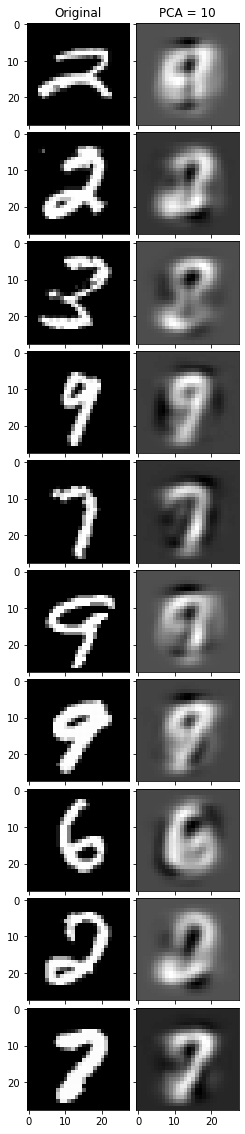


PCA for 30 eigenvectors

 Mean error: 914.0031246914328


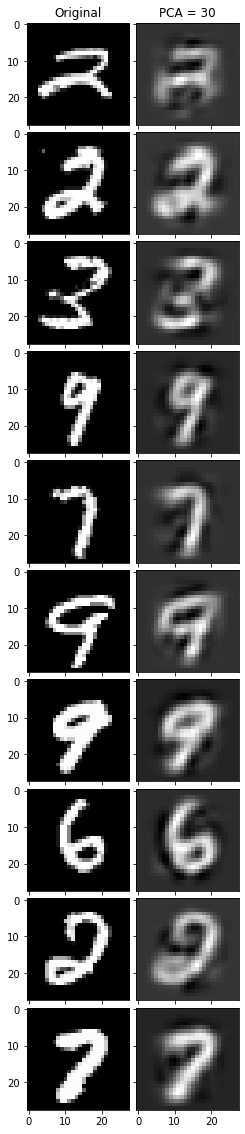


PCA for 50 eigenvectors

 Mean error: 757.0834499706091


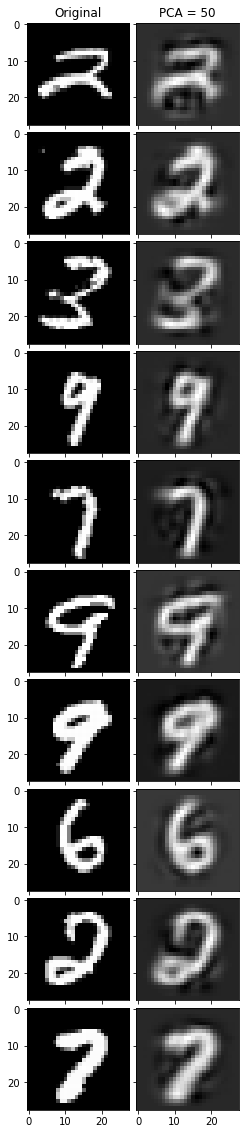


PCA for 100 eigenvectors

 Mean error: 534.3076975338176


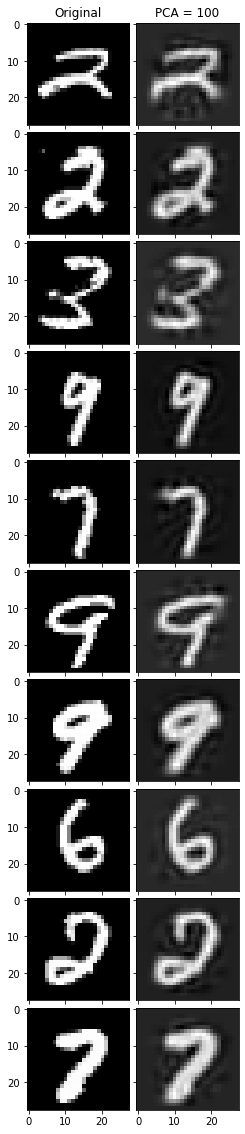


PCA for 200 eigenvectors

 Mean error: 345.0229132338126


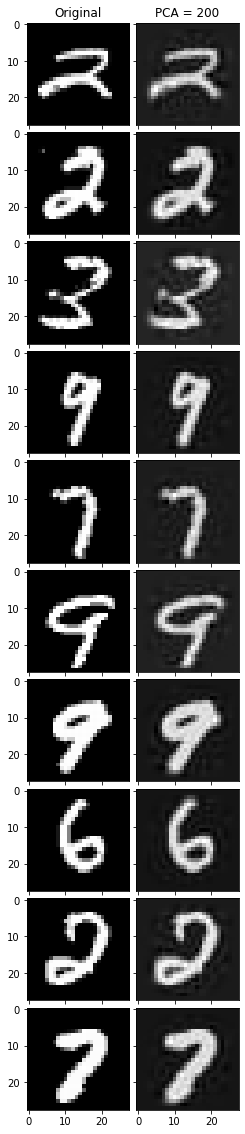


PCA for 400 eigenvectors

 Mean error: 96.68592377632629


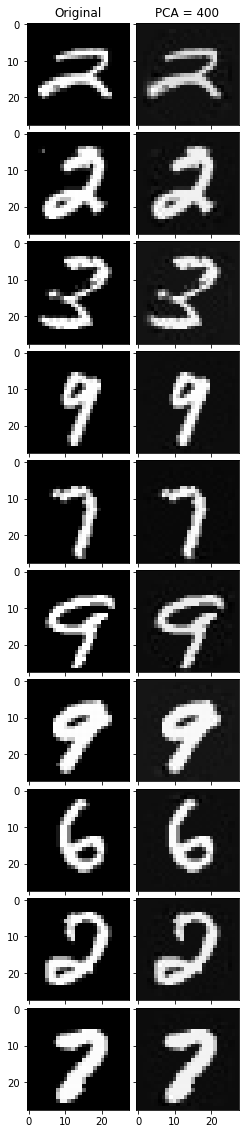


PCA for 700 eigenvectors

 Mean error: 3.953591105303659e-12


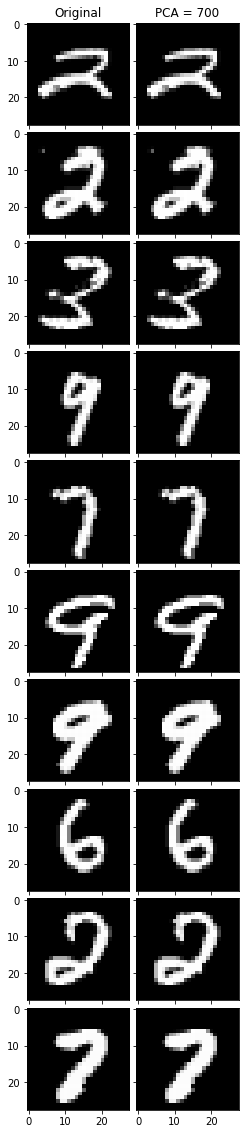

In [10]:
# Values for k
k_values = [10, 30, 50, 100, 200, 400, 700]

# Number of images to test
num_images = 10

# Choose num_images random images from dataset
image_indices = np.random.choice(data.shape[0], num_images)

# List to save mean error for each choice of k
error_history = []

for k in k_values:
    
    print("\nPCA for %s eigenvectors" % k)
    
    # Perform PCA
    
    X_svd, V, lambdas = pca(data, k)
    
    images = []
        
    for index in image_indices:
        
        # Reconstruct each image
    
        x_hat = V.dot(X_svd[index])
        
        images.append(data[index])
        images.append(x_hat)
        
    # Calculate mean reconstruction error
    
    error = np.mean([np.linalg.norm(images[i]-images[i+1]) for i in range(0, len(images), 2)])
    error_history.append(error)
    
    print("\n Mean error: %s" % error)
        
    # Plot original and reconstructed images

    show_images(num_images, 2, images, (28, 28), ["Original", "PCA = "+str(k)], 20.)

#### c) Graph of reconstruction error vs number of components

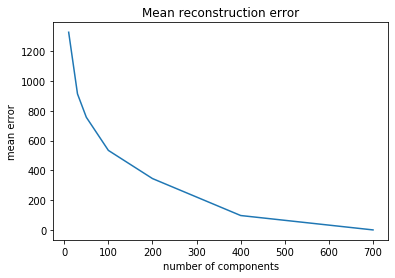

In [11]:
plt.plot(k_values, error_history)
plt.title("Mean reconstruction error")
plt.xlabel('number of components')
plt.ylabel('mean error')
plt.show()

Mean projection of each number with k eigenvectors

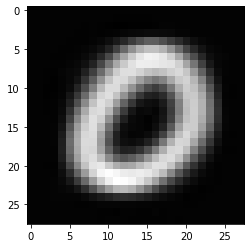

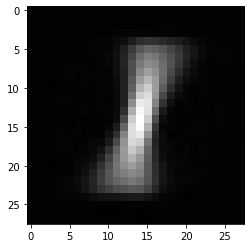

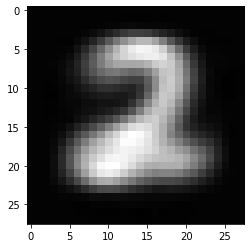

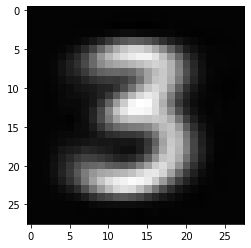

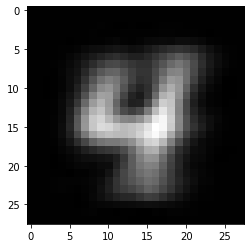

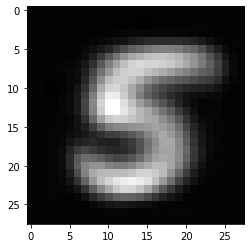

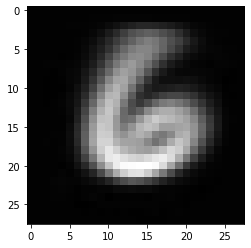

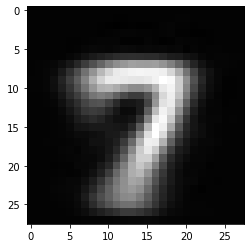

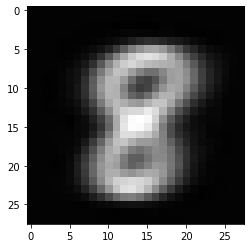

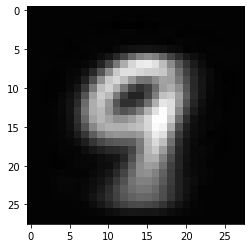

In [186]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
data_numbers = X_test.reshape((10000, 28*28))

k = 200
X_svd, V, lambdas = pca(data_numbers, k)

# Iterate over {0, 1, ..., 9} digits

for digit in range(10):
    
    # Indices of images with number equal to digit (0, 1, ..., 9)

    num_indices = [i for i in range(len(y_test)) if y_test[i] == digit]

    # Extract projections

    projections = X_svd[num_indices]

    mean_projection = np.mean(projections, axis = 0)

    x_hat = V.dot(mean_projection)

    plt.imshow(x_hat.reshape((28, 28)),
                           cmap=plt.cm.gray,
                           interpolation="nearest")
    plt.show()

#### Discusión

Calculando la varianza explicada, se pudo observar que con 380 dimensiones se puede explicar prácticamente toda la varianza en los datos y que las primeras componentes son las más importantes y cada vez que se agrega una nueva, se vuelven menos importantes.

Visualizando los primeros 9 eigenvectores se puede observar que cada componente capta la forma de algún dígito, especialmente la del cero. Esto se puede notar también al tratar de reconstruir los dígitos con pocos eigenvectores (10, 30, 50), donde aún se puede ver en el fondo una forma circular.

Por otro lado, de la gráfica de error de reconstrucción se confirma que las primeras componentes son las más importantes ya que son las que hacen que reduzca de manera más significativa el error y por lo tanto que mejor capturan la varianza y estructura de las imágenes.

Finalmente, al promediar las proyeccciones de cada dígito, se observó que se obtiene una representación promedio que muestra como debería verse cada dígito, eliminando las deformaciones y varianza que hay entre cada dígito y de como lo escribe cada persona.

### Ejercicio 3. AT&T Faces

Load data

In [12]:
from sklearn.datasets import fetch_olivetti_faces
data, targets = fetch_olivetti_faces(return_X_y=True)

print("{0} data examples of size {1}".format(data.shape[0], data.shape[1]))

400 data examples of size 4096


Visualizing images

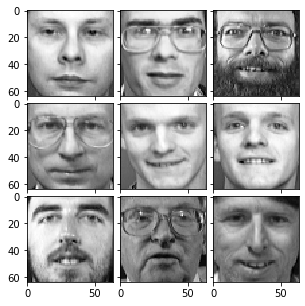

In [13]:
show_images(3, 3, np.random.permutation(data)[:9], (64, 64))

#### a) PCA and variance explained by k first components

Define number of eigenvectors to use

In [14]:
k = 300

Apply PCA to matrix of images $X$

In [15]:
X_svd, V, lambdas = pca(data, k)

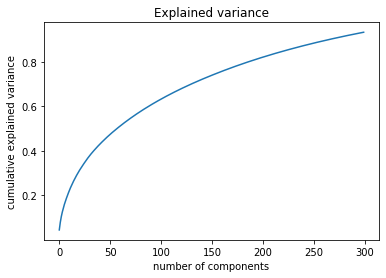

Explained variance by the first 300 eigenvectors: 0.9335078


In [16]:
var_ratio = [l/np.sum(lambdas) for l in lambdas[:k]]

plt.plot(np.cumsum(var_ratio))
plt.title("Explained variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print("Explained variance by the first %s eigenvectors: %s" % (k, np.sum(lambdas[:k])/np.sum(lambdas)))

Visualizing first 9 eigenfaces

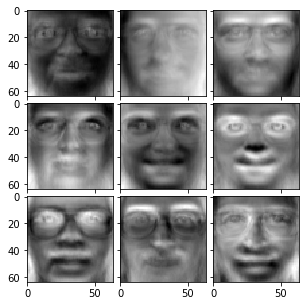

In [17]:
show_images(3, 3, V.T[:9], (64, 64))

#### b) PCA for different values of k


PCA for 10 eigenvectors

 Mean error: 7.886963


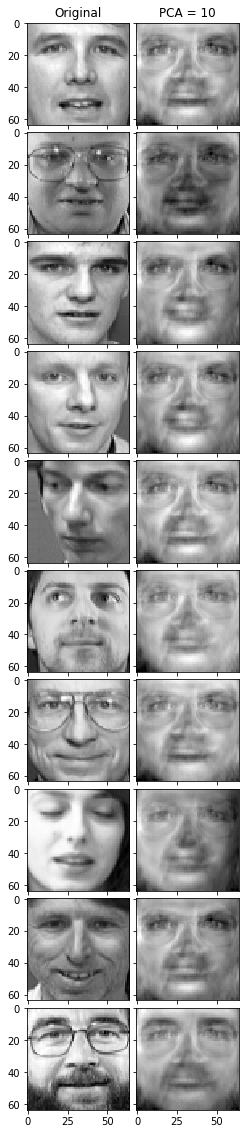


PCA for 30 eigenvectors

 Mean error: 5.6489654


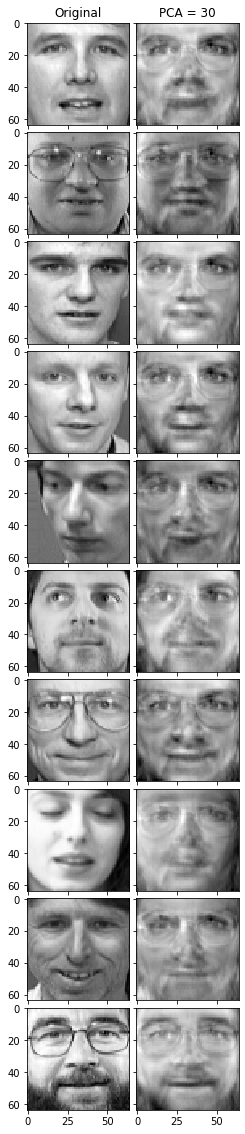


PCA for 50 eigenvectors

 Mean error: 4.659981


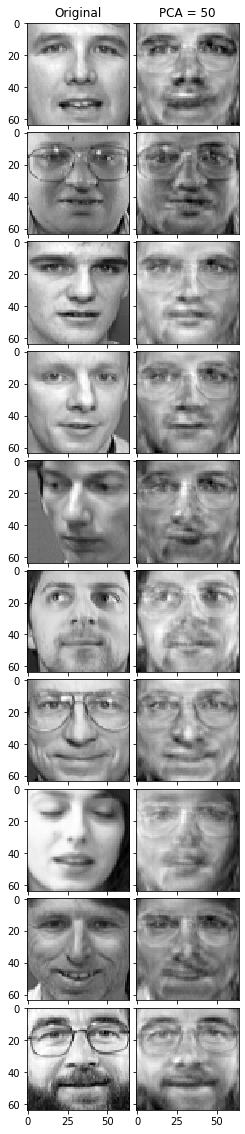


PCA for 100 eigenvectors

 Mean error: 3.6155262


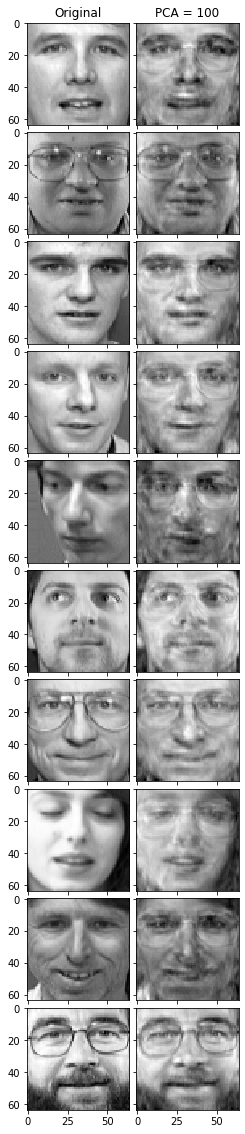


PCA for 200 eigenvectors

 Mean error: 2.5613463


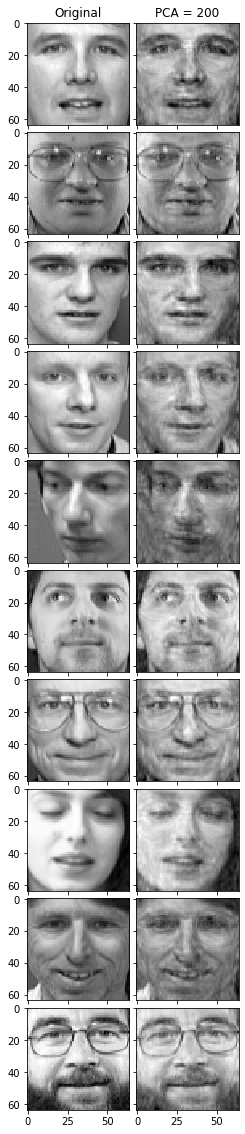


PCA for 400 eigenvectors

 Mean error: 1.8027967


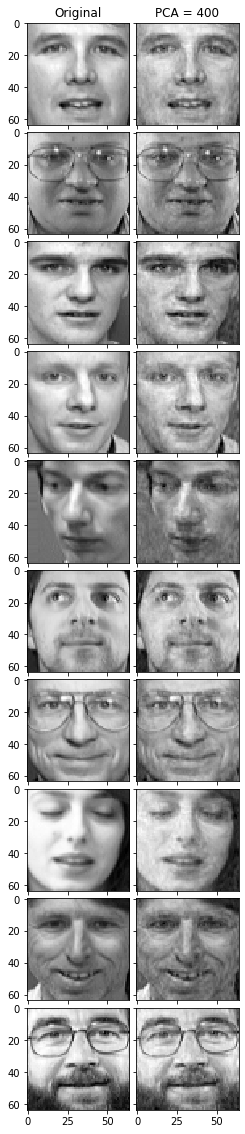


PCA for 2000 eigenvectors

 Mean error: 1.3010708


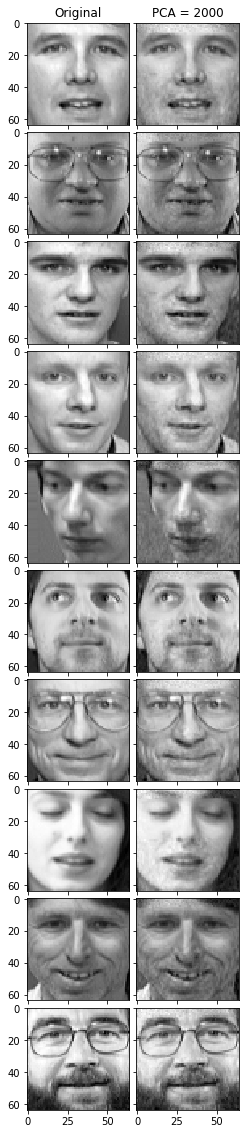

In [18]:
# Values for k
k_values = [10, 30, 50, 100, 200, 400, 2000]

# Number of images to test
num_images = 10

# Choose num_images random images from dataset
image_indices = np.random.choice(data.shape[0], num_images)

# List to save mean error for each choice of k
error_history = []

for k in k_values:
    
    print("\nPCA for %s eigenvectors" % k)
    
    # Perform PCA
    
    X_svd, V, lambdas = pca(data, k)
    
    images = []
        
    for index in image_indices:
        
        # Reconstruct each image
    
        x_hat = V.dot(X_svd[index])
        
        images.append(data[index])
        images.append(x_hat)
        
    # Calculate mean reconstruction error
    
    error = np.mean([np.linalg.norm(images[i]-images[i+1]) for i in range(0, len(images), 2)])
    error_history.append(error)
    
    print("\n Mean error: %s" % error)
        
    # Plot original and reconstructed images

    show_images(num_images, 2, images, (64, 64), ["Original", "PCA = "+str(k)], 20.)

#### c) Graph of reconstruction error vs number of components

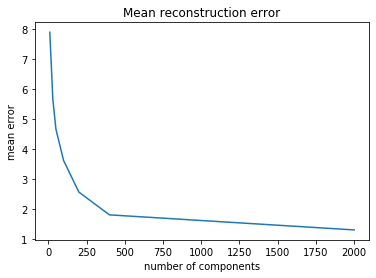

In [19]:
plt.plot(k_values, error_history)
plt.title("Mean reconstruction error")
plt.xlabel('number of components')
plt.ylabel('mean error')
plt.show()

Generating random faces

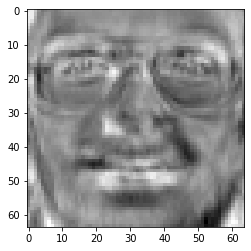

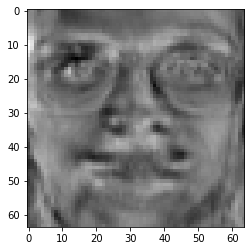

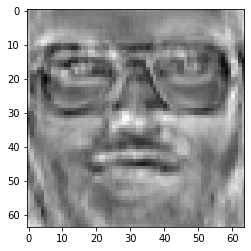

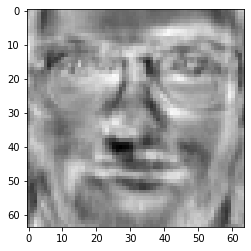

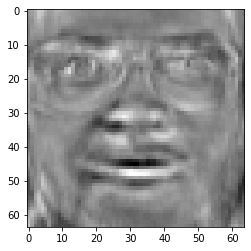

In [208]:
k = 80
X_svd, V, lambdas = pca(data, k)

for i in range(5):
    
    mu = np.mean(X_svd[200])
    std = np.std(X_svd[200])
    weights = np.random.uniform(-10, 10, k)
    x_hat = V.dot(weights)
    plt.imshow(x_hat.reshape((64, 64)),
                       cmap=plt.cm.gray,
                       interpolation="nearest")
    plt.show()

#### Discusión

Calculando la varianza explicada, se pudo observar que con 300 dimensiones se puede explicar cerca del 93% de toda la varianza en los datos y que las primeras componentes son las más importantes y cada vez que se agrega una nueva, se vuelven menos importantes.

Visualizando los primeros 9 eigenvectores se puede observar que casi todas las componentes capturan la forma de la cara, variando entre cada componente características o rasgos de las caras, como lo son: las cejas, bigote, barba y forma de la boca. 

Por otro lado, de la gráfica de error de reconstrucción se confirma que las primeras componentes son las más importantes ya que son las que hacen que reduzca de manera más significativa el error y por lo tanto que mejor capturan la varianza y estructura de las imágenes.

Finalmente, se hizo el experimento de generar caras aleatoreas, donde en vez de usar las proyeccciones, se genera un vector aleatorio con distribución uniforme y con este vector se combinan los eigenfaces. Lo que se pudo observar es que se generaban rostros con ciertos sesgos, como el generar siempre caras con lentes o bigote. Por lo que una mejora podría ser investigar como hacer este método más robusto.

También se hace la observación que con este método se podría realizar clasificación de rostros ya que con los vectores de proyecciones se puede hacer clustering y al momento de que llegue una nueva imagen de un rostro se podría comparar la distancia a las proyecciones de los rostros ya conocidos y asignarlo a la persona cuya proyección esté más cercana.